# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

boston = pd.read_csv('boston_data.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [3]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [4]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [6]:
boston.chas= np.where(boston.chas == 1, 'true', 'false')
boston.dtypes

crim       float64
zn         float64
indus      float64
chas        object
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [7]:
stats = boston.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
crim,404.0,3.730912,8.943922,0.00632,0.082382,0.253715,4.053158,88.9762,3.970775
zn,404.0,10.509901,22.053733,0.00000,0.000000,0.000000,12.500000,95.0000,12.500000
indus,404.0,11.189901,6.814909,0.46000,5.190000,9.795000,18.100000,27.7400,12.910000
nox,404.0,0.556710,0.117321,0.39200,0.453000,0.538000,0.631000,0.8710,0.178000
rm,404.0,6.301450,0.675830,3.56100,5.902750,6.230500,6.629250,8.7800,0.726500
age,404.0,68.601733,28.066143,2.90000,45.800000,76.600000,94.150000,100.0000,48.350000
dis,404.0,3.799666,2.109916,1.16910,2.087875,3.207450,5.222125,12.1265,3.134250
rad,404.0,9.836634,8.834741,1.00000,4.000000,5.000000,24.000000,24.0000,20.000000
tax,404.0,411.688119,171.073553,187.00000,281.000000,330.000000,666.000000,711.0000,385.000000
ptratio,404.0,18.444554,2.150295,12.60000,17.375000,19.000000,20.200000,22.0000,2.825000


In [33]:
outliers = pd.DataFrame(columns=boston.columns)
 
for col in stats.index:
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 1.5
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = boston[(boston[col] < lower) | 
                   (boston[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)
outliers

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Outlier
8,10.06230,0.0,18.10,false,0.584,6.833,94.3,2.0882,24.0,666.0,20.2,81.33,19.69,14.1,crim
10,25.94060,0.0,18.10,false,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64,10.4,crim
14,15.17720,0.0,18.10,false,0.740,6.152,100.0,1.9142,24.0,666.0,20.2,9.32,26.45,8.7,crim
17,15.02340,0.0,18.10,false,0.614,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,12.0,crim
34,38.35180,0.0,18.10,false,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0,crim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,9.23230,0.0,18.10,false,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0,medv
352,2.01019,0.0,19.58,false,0.605,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0,medv
382,6.53876,0.0,18.10,true,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0,medv
388,0.33147,0.0,6.20,false,0.507,8.247,70.4,3.6519,8.0,307.0,17.4,378.95,3.95,48.3,medv


In [34]:
print(len(outliers.index.unique()))

158


In [35]:
boston=boston.drop(index=outliers.index)
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,false,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,false,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,false,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,false,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,false,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,0.06899,0.0,25.65,false,0.581,5.870,69.7,2.2577,2.0,188.0,19.1,389.15,14.37,22.0
397,0.10084,0.0,10.01,false,0.547,6.715,81.6,2.6775,6.0,432.0,17.8,395.59,10.16,22.8
398,0.67191,0.0,8.14,false,0.538,5.813,90.3,4.6820,4.0,307.0,21.0,376.88,14.81,16.6
399,9.32909,0.0,18.10,false,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1


### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

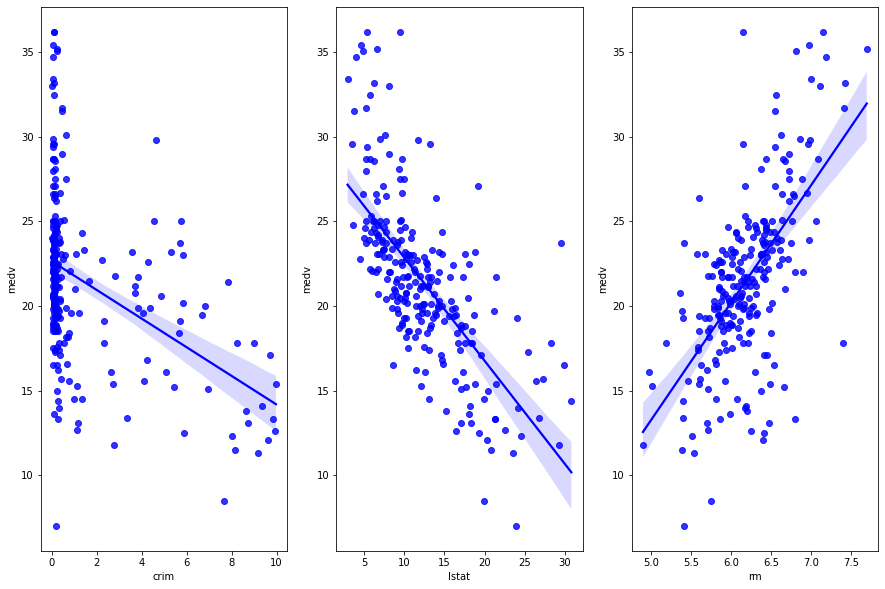

In [36]:
# Your plots here
corr_var = ['crim', 'lstat', 'rm']

f, axes = plt.subplots(1, len(corr_var), figsize=(15, 10))

for i, f in enumerate(corr_var):
    sns.regplot(x=boston[f], y=boston['medv'], color="b",ax=axes[i])

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [37]:
# Your response here
# median value decreases as the crim rate increases 
# median value decreases with the lowest status of the population (lowest is the pop status, lowest is the median value)
# median value increases with the number of rooms

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

<AxesSubplot:>

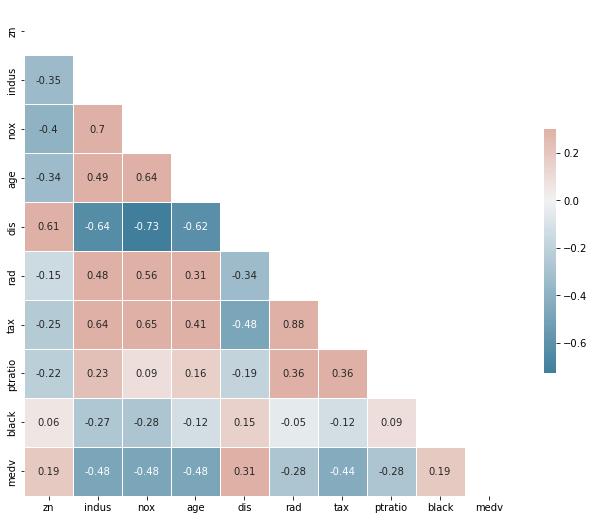

In [38]:
# Your response here
remaining_var=boston.drop(corr_var, axis=1)

corr = remaining_var.corr().round(2)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [39]:
# Your code here
boston.describe()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,1.352420,3.884146,10.883293,0.542052,6.185996,67.167886,3.935714,7.735772,370.711382,18.677642,388.683618,12.256545,21.492276
std,2.487150,8.582005,6.307069,0.107413,0.445766,26.651000,1.752579,7.422477,151.442621,1.773325,11.545275,5.643095,4.986461
min,0.006320,0.000000,1.380000,0.409000,4.903000,2.900000,1.321600,1.000000,188.000000,14.700000,343.280000,2.940000,7.000000
25%,0.088267,0.000000,5.960000,0.458500,5.885750,48.125000,2.506175,4.000000,277.000000,17.800000,386.457500,8.062500,18.825000
50%,0.180290,0.000000,8.560000,0.520000,6.167000,70.850000,3.651900,5.000000,307.000000,18.900000,393.245000,11.170000,21.400000
75%,0.786055,0.000000,18.100000,0.581000,6.437750,91.175000,5.237175,6.750000,403.000000,20.200000,396.900000,15.455000,23.900000
max,9.966540,30.000000,27.740000,0.871000,7.691000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,30.810000,36.200000


In [48]:
boston.dtypes

crim       float64
zn         float64
indus      float64
chas        object
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [50]:
boston.chas = np.where(boston.chas == 'true', 1, 0)
boston.dtypes

crim       float64
zn         float64
indus      float64
chas         int32
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [51]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [52]:
# Your code here
x = boston.drop(['medv'], axis=1)
y = boston['medv']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [58]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
train=[]
test=[]
param=range(2,21,2)
for p in param:
    rfr = RandomForestRegressor(max_depth=p, random_state=42)
    rfr.fit(x_train, y_train)
    train.append(rfr.score(x_train,y_train))
    test.append(rfr.score(x_test,y_test))

Now, plot the score for each tree on the training set and on the testing set.

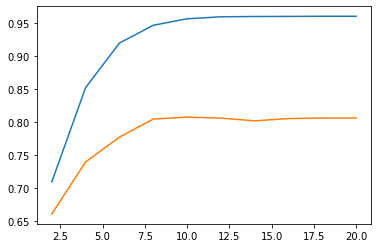

In [59]:
# Produce a plot with the score for the testing and training for the different max depths
plt.plot(param, train)
plt.plot(param, test)

What do these results tell you about the effect of the depth of the trees on the performance of the model?

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [61]:
# Your response here
rfr = RandomForestRegressor(max_depth=8)
rfr.fit(x_train, y_train)
print(rfr.score(x_train, y_train))

0.9492482870178585


### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here